In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mindspore import nn, Tensor, ops
import mindspore
from IPython.display import display, clear_output
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [7]:
# load data
train=pd.read_csv('data_preprocess.csv')

In [8]:
# Convert object features to one-hot encoding and remove properties that are not needed for classification
train.drop(['car_ID','CarName','brand'],axis=1,inplace=True)
train=pd.get_dummies(train)
train=train.astype(np.float64)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    float64
 1   wheelbase             205 non-null    float64
 2   carheight             205 non-null    float64
 3   curbweight            205 non-null    float64
 4   cylindernumber        205 non-null    float64
 5   enginesize            205 non-null    float64
 6   boreratio             205 non-null    float64
 7   stroke                205 non-null    float64
 8   compressionratio      205 non-null    float64
 9   horsepower            205 non-null    float64
 10  peakrpm               205 non-null    float64
 11  price                 205 non-null    float64
 12  carsize               205 non-null    float64
 13  mpg                   205 non-null    float64
 14  fueltype_diesel       205 non-null    float64
 15  fueltype_gas          2

Text(0.5, 0, 'n_components')

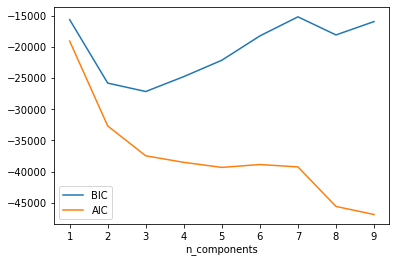

In [9]:
# Select the most appropriate number of clusters
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1, 10)
models = [GMM(n, random_state=42).fit(train)
          for n in n_components]

plt.plot(n_components, [m.bic(train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [13]:
train_pre=pd.read_csv('car_price.csv')
train_pre['brand']=train_pre['CarName'].str.split(" ",expand=True)[0]
train_pre['brand']=train_pre['brand'].replace({'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche','maxda':'mazda','Nissan':'nissan'})
car_base_info=train_pre[['car_ID','CarName','carbody','brand']]

In [15]:
# train GMM
car_base_info
gaussian=GMM(n_components=5,random_state=42).fit(train)
gaussian_pred=gaussian.predict(train)
preds = pd.DataFrame({'class':gaussian_pred})

result=pd.concat((car_base_info,preds),axis=1)
result

,car_ID,CarName,carbody,brand,class
0,1,alfa-romero giulia,convertible,alfa-romero,3
1,2,alfa-romero stelvio,convertible,alfa-romero,3
2,3,alfa-romero Quadrifoglio,hatchback,alfa-romero,3
3,4,audi 100 ls,sedan,audi,0
4,5,audi 100ls,sedan,audi,3
...,...,...,...,...,...
200,201,volvo 145e (sw),sedan,volvo,4
201,202,volvo 144ea,sedan,volvo,4
202,203,volvo 244dl,sedan,volvo,4
203,204,volvo 246,sedan,volvo,4


In [25]:
# evaluate
correct = 0
result['class']
train_pre['symboling']
for i in range (len(result['class'])):
    if result['class'][i] == train_pre['symboling'][i]:
        correct+=1
        
res = correct/len(result['class'])
res

0.33170731707317075